Let's start with some basic data analysis in Python! Therefor we need two popular python packages

- ***Pandas***: "[pandas](https://pandas.pydata.org) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language*"


- ***Matplotlib***: "[Matplotlib](https://matplotlib.org) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms*"


## Installation

```conda install pandas matplotlib```

OR

```pip install pandas matplotlib```


## Powerful pandas

<img src="images/pandas.png"  width=300 align=right />


Pandas is a very powerful and flexible tool for data munging and preparing. 

Pandas deals with 3 data structures:
- **Series**: homogeneous 1-dimensional array
- **DataFrames**: heterogenous 2-dimensional array
- **Panel**: heterogenous 3-dimensional array


Pandas features two basic types: Series and DataFrame. A series holds an one-dimensional labeled array, a dataframe is a 2-dimensional labeled data structure with columns of potentially different types (think spreadsheet).

Both are composed of data and an index (the row labels). A dataframe has columns wioth column labels.

Here is how they are defined and what they look like

<img src="images/dataframe.png" width=600   />

First a we look at Series:

In [9]:
import numpy as np
s = pd.Series(np.random.randint(0, 10, size=10), name='example')
s

0    3
1    9
2    3
3    0
4    8
5    9
6    7
7    4
8    6
9    6
Name: example, dtype: int64

Access the values with .values, the index with .index.

In [10]:
print('Values', s.values)
print('Index', s.index)

Values [3 9 3 0 8 9 7 4 6 6]
Index RangeIndex(start=0, stop=10, step=1)


Now we look at a DataFrames:

You'll probably more often work with DataFrames, as they can store multiple variables.

You can create dataframes in many ways, but most often you will read the data from file (i.e. with the read_csv() function).

One way to define a dataframe is with a dictionary of columns.


In [11]:
d = {'one': [1,2,3,4], 'two': [4.1, 3.4, 2.1, 1.3]}
pd.DataFrame(d)

,one,two
0,1,4.1
1,2,3.4
2,3,2.1
3,4,1.3


Or by passing Series elements:

In [15]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)



You can also combine multiple dictionaries with different data types

In [19]:
df2 = pd.DataFrame({ 'Number' : np.array([3] * 6,dtype='int32'),
                    'Time' : pd.Timestamp.today(),
                    'Name' : pd.Series(['Dave','Jim','Rosalee','Alex','Lucy','Anna'], index=list(range(6))),
                    'Age' : np.array([25,40,37,24,28,45]),
                    'Sex' : pd.Categorical(["male","male","female","male","female","female"])})
df2

,Number,Time,Name,Age,Sex
0,3,2022-01-26 18:55:55.181902,Dave,25,male
1,3,2022-01-26 18:55:55.181902,Jim,40,male
2,3,2022-01-26 18:55:55.181902,Rosalee,37,female
3,3,2022-01-26 18:55:55.181902,Alex,24,male
4,3,2022-01-26 18:55:55.181902,Lucy,28,female
5,3,2022-01-26 18:55:55.181902,Anna,45,female


Let's read some real world data


In [4]:
import pandas as pd

df = pd.read_csv('../data/forestfires.csv', sep=',')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


First of all we want to have a first glance at the data we are dealing with. Pandas provides in-built functions for data inspection.

In [5]:
# The first rows of the dataframe
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
df.index               # display index

RangeIndex(start=0, stop=517, step=1)

In [8]:
df.columns  

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [9]:
df.values   

array([[7, 5, 'mar', ..., 6.7, 0.0, 0.0],
       [7, 4, 'oct', ..., 0.9, 0.0, 0.0],
       [7, 4, 'oct', ..., 1.3, 0.0, 0.0],
       ...,
       [7, 4, 'aug', ..., 6.7, 0.0, 11.16],
       [1, 4, 'aug', ..., 4.0, 0.0, 0.0],
       [6, 3, 'nov', ..., 4.5, 0.0, 0.0]], dtype=object)

In [10]:
# the shape of the dataframe
df.shape

(517, 13)

In [11]:
# the data types
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [12]:
sort = df.sort_values(by='rain')
sort.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
349,5,4,sep,fri,92.1,99.0,745.3,9.6,12.8,64,3.6,0.0,1.64
348,3,4,sep,fri,92.1,99.0,745.3,9.6,17.4,57,4.5,0.0,0.00
347,5,4,sep,fri,92.1,99.0,745.3,9.6,10.1,75,3.6,0.0,0.00
346,1,4,sep,mon,91.5,130.1,807.1,7.5,21.3,35,2.2,0.0,28.19


Columns 'month' and 'day' are of type object (this means 'string' or anything else pandas can not do computations with). However, they should actually be of type categorical as the values have to be from a defined set of values (month names, day names).

In [13]:
# column month converted to categorical dtype
c1 = pd.Categorical(df.month)
c1

['mar', 'oct', 'oct', 'mar', 'mar', ..., 'aug', 'aug', 'aug', 'aug', 'nov']
Length: 517
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']

In [14]:
# column month converted to categorical dtype and giving a category set and order
c2 = pd.Categorical(df.month, categories=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
c2

['mar', 'oct', 'oct', 'mar', 'mar', ..., 'aug', 'aug', 'aug', 'aug', 'nov']
Length: 517
Categories (12, object): ['jan', 'feb', 'mar', 'apr', ..., 'sep', 'oct', 'nov', 'dec']

In [15]:
# assign the new column back to the dataframe
df['month'] = c2


The dataframe contains records of burned areas (column "area"). Let's quickly visualize the distribution.


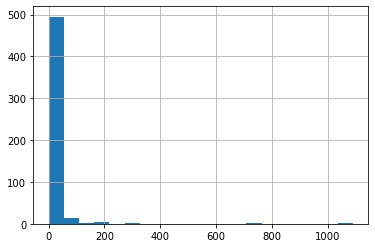

In [16]:
df.area.hist(bins=20);

Seems there are actually a lot of records without any burned area (area==0). Let's count them.


In [17]:
len(df[df.area == 0])

247

We want to find out when most forest fires occur. So let's filter the data. We can simply use value_counts() on the month column to find this out:


In [18]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

However, this also includes the rows with no fires. So we filter them first. We also normlize the counts and plot it in one line.


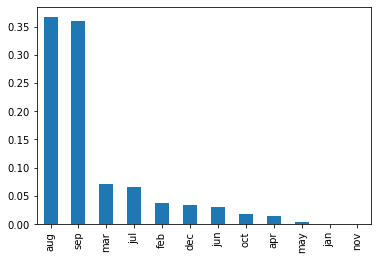

In [19]:
df[df.area > 0].month.value_counts(normalize=True).plot(kind='bar');

This actualy shows another power of pandas. It's very easy to chain operations and to directly visualize them. Pandas has some plotting directives incorporated, we will get to know more on that in the plotting lesson.


Pandas provides a large set of summary functions that operate on different kinds of pandas object

- **sum():**                 Sum values of each object.
- **count():**               Count non-NA/null values of each object.
- **median():**              Median value of each object.
- **quantile([0.25,0.75]):** Quantiles of each object.
- **apply(function):** Apply function to each object.
- **min():** Minimum value in each object.
- **max():** maximum value in each object.
- **mean():** Mean value of each object.
- **var():** Variance of each object.
- **std():** Standard deviation of each object

 ## Visualize data with python

Producing high-quality graphics is one of the main reasons for doing statistical computing. For this purpose, we will use the matplotlib library, which is probably the most used python library for 2D-graphics. Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. Matplotlib allows a quick data visualization and the creation of publication-quality figures.
Import matplotlib's pyplot module as well as numpy and pandas.
(Pyplot is a module in the matplotlib package. The module allows you to implicitly and automatically create figures and axes)

Some of the major Pros of Matplotlib are:

- easy to get started for simple plots
- custom labels and texts
- control of every element in a figure
- high-quality output in many formats
 

In [20]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let´s start with something easy. The code below creates a basic plot. The np.linspace function is used to create an array with evenly spaced numbers over a specified interval.
In Matplotlib the plot() functions is used to create the plot. If want display the plot you have to use the show() function.

In [22]:
import random

# Make the plot reproducible
random.seed(1)
# Allow plotting in the notebook
%matplotlib inline
# Create some fake data
data1 = [random.randint(0, 50) for i in range(70)]
data1

[8,
 36,
 48,
 4,
 16,
 7,
 31,
 48,
 28,
 30,
 41,
 24,
 50,
 13,
 6,
 31,
 1,
 24,
 27,
 38,
 48,
 49,
 0,
 44,
 28,
 17,
 46,
 14,
 37,
 6,
 20,
 1,
 1,
 1,
 41,
 34,
 0,
 24,
 43,
 13,
 27,
 46,
 1,
 33,
 14,
 48,
 28,
 31,
 35,
 14,
 22,
 14,
 43,
 14,
 48,
 29,
 18,
 1,
 26,
 35,
 41,
 6,
 11,
 40,
 46,
 18,
 7,
 47,
 21,
 46]

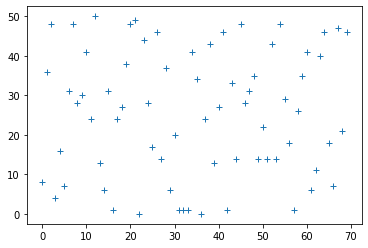

In [23]:
plt.plot(data1, "+")

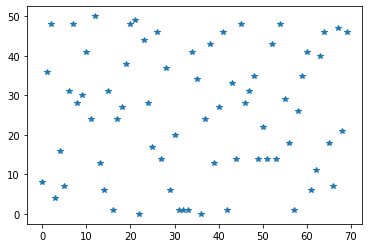

In [24]:
plt.plot(data1, "*")

#### Basic Matplotlib Commands

We can create a very simple line plot using the following code 

In [25]:
x = np.linspace(0, 5, 11)
y = x ** 2

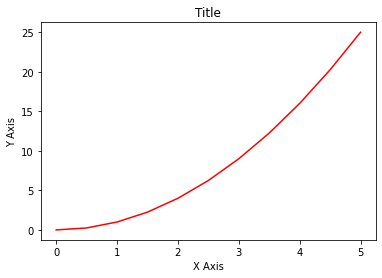

In [26]:
plt.plot(x, y, 'r') # 'r' == red
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Title')
plt.show()

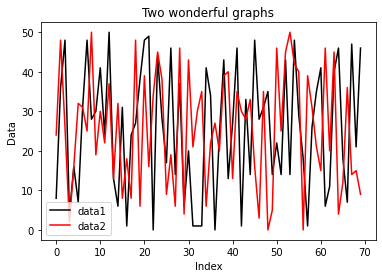

In [27]:
# Create a second dataset to plot also
import random
random.seed(0)
data2 = [random.randint(0, 50) for i in range(70)]

# Make the plotting
plt.plot(data1, "-", color="black", label="data1")
plt.plot(data2, "-", color="red", label="data2")


plt.xlabel("Index")
plt.ylabel("Data")
# Also label the figure as a whole
plt.title("Two wonderful graphs")
# And finally simply call the legend 
plt.legend()
plt.show()

####   The Matplotlib Object Hierarchy


- When we call plt.plot(x, y), we internally create a hierarchy of nested Python objects: Figure and Axes.

- A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects.

- An Axes actually translates into what we think of as an individual plot or graph

- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels


<img src="images/matplot.png"/>


<img src="images/matplot.jpg"/>

Text(0.5, 1.0, 'Title')

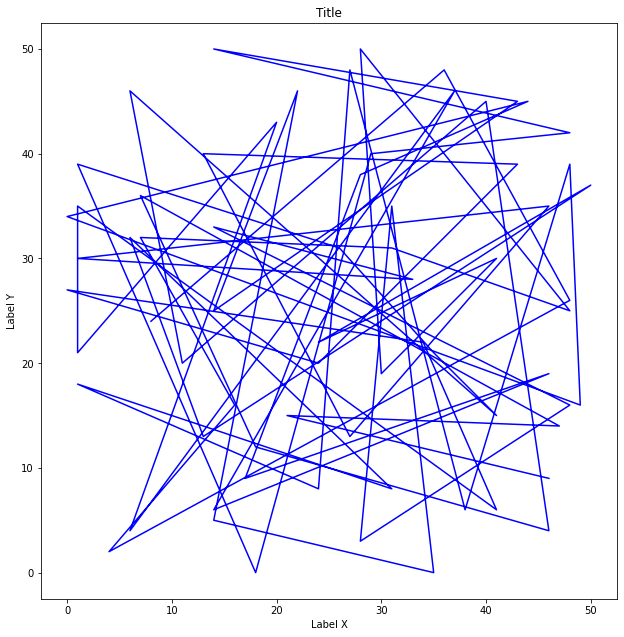

In [28]:
x=data1
y=data2
# Create Figure (empty canvas)
fig = plt.figure(figsize=(10,10))

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Label X') # Notice the use of set_ to begin methods
axes.set_ylabel('Label Y')
axes.set_title('Title')


Although this looks more complicated using this method gives us full control over the plot

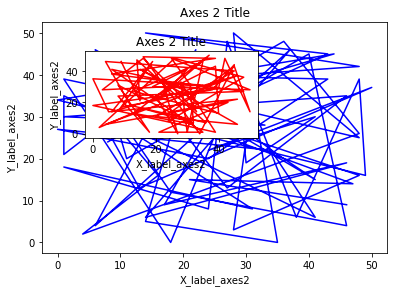

In [29]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

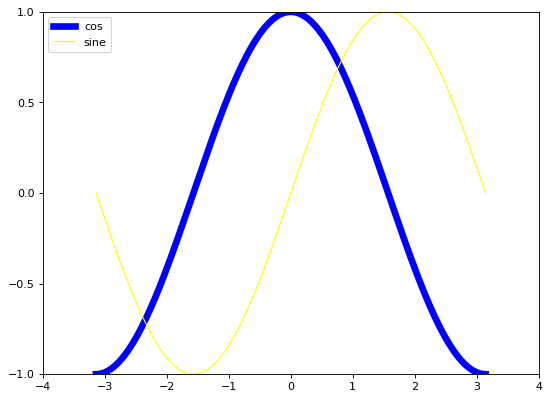

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Figure size
plt.figure(figsize=(8, 6), dpi=80)


# new subplot 
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
# Plot cosine 
plt.plot(X, C, color="blue", linewidth=6.0, linestyle="-",label='cos')
# Plot sine 
plt.plot(X, S, color="yellow", linewidth=1.0, linestyle="-",label='sine')
# X-axes limits
plt.xlim(-4.0, 4.0)
# X-axes ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# Y-axes limits
plt.ylim(-1.0, 1.0)
# Y-axes ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)
plt.legend(loc='upper left')
# Show result on screen
plt.show()

Let's make some plots with some real data

In [51]:
import pandas as pd

global_temp = pd.read_csv("../data/GlobalLandTemperaturesByMajorCity.csv")
global_temp.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [52]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.index = global_temp['dt'] 
global_temp= global_temp.groupby([global_temp.index.year])['AverageTemperature','AverageTemperatureUncertainty'].mean().reset_index()
global_temp
#global_temp.index.month
#global_temp.dt.dt.year

/tmp/ipykernel_221251/2170875398.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  global_temp= global_temp.groupby([global_temp.index.year])['AverageTemperature','AverageTemperatureUncertainty'].mean().reset_index()


,dt,AverageTemperature,AverageTemperatureUncertainty
0,1743,4.020077,1.911923
1,1744,10.344192,1.803087
2,1745,0.384885,1.811673
3,1746,NaN,NaN
4,1747,NaN,NaN
...,...,...,...
266,2009,19.833752,0.352505
267,2010,19.911734,0.364115
268,2011,19.549197,0.390158
269,2012,19.668239,0.497471


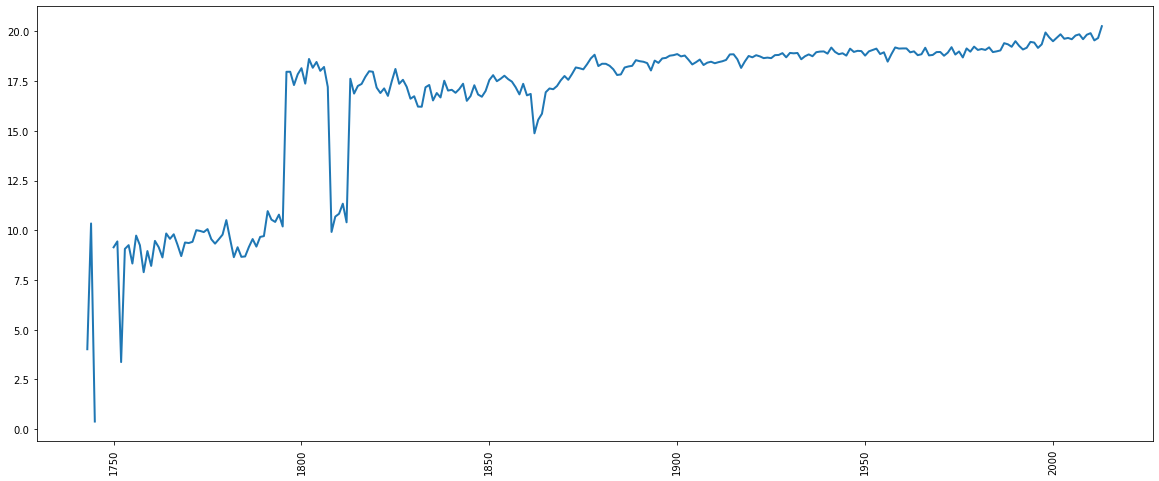

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[20,8])
ax = plt.axes()
line, = ax.plot( global_temp['dt'], global_temp['AverageTemperature'], lw=2) # lw = linewidth
plt.xticks(rotation='vertical')
plt.show()


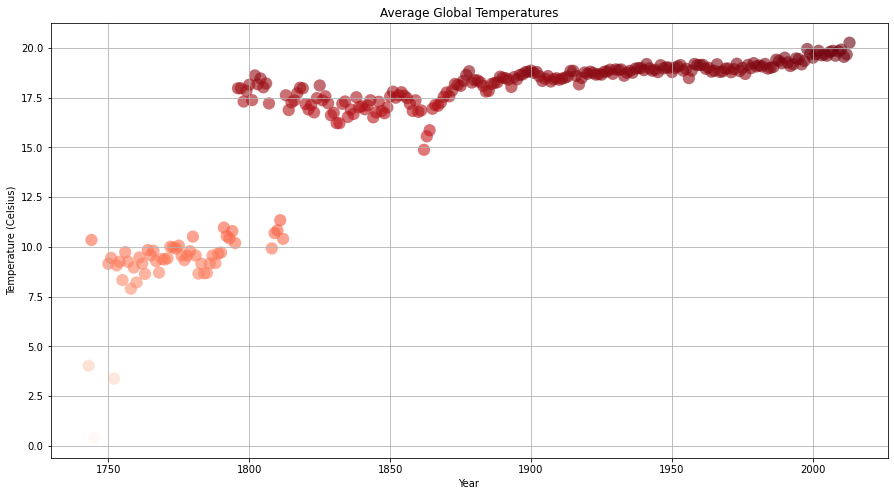

In [54]:
plt.figure(figsize=(15, 8))
plt.scatter(global_temp['dt'], global_temp['AverageTemperature'], c=global_temp['AverageTemperature'], s=150, alpha=0.6, edgecolors='none', cmap='Reds')
plt.grid(True)
plt.title("Average Global Temperatures")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

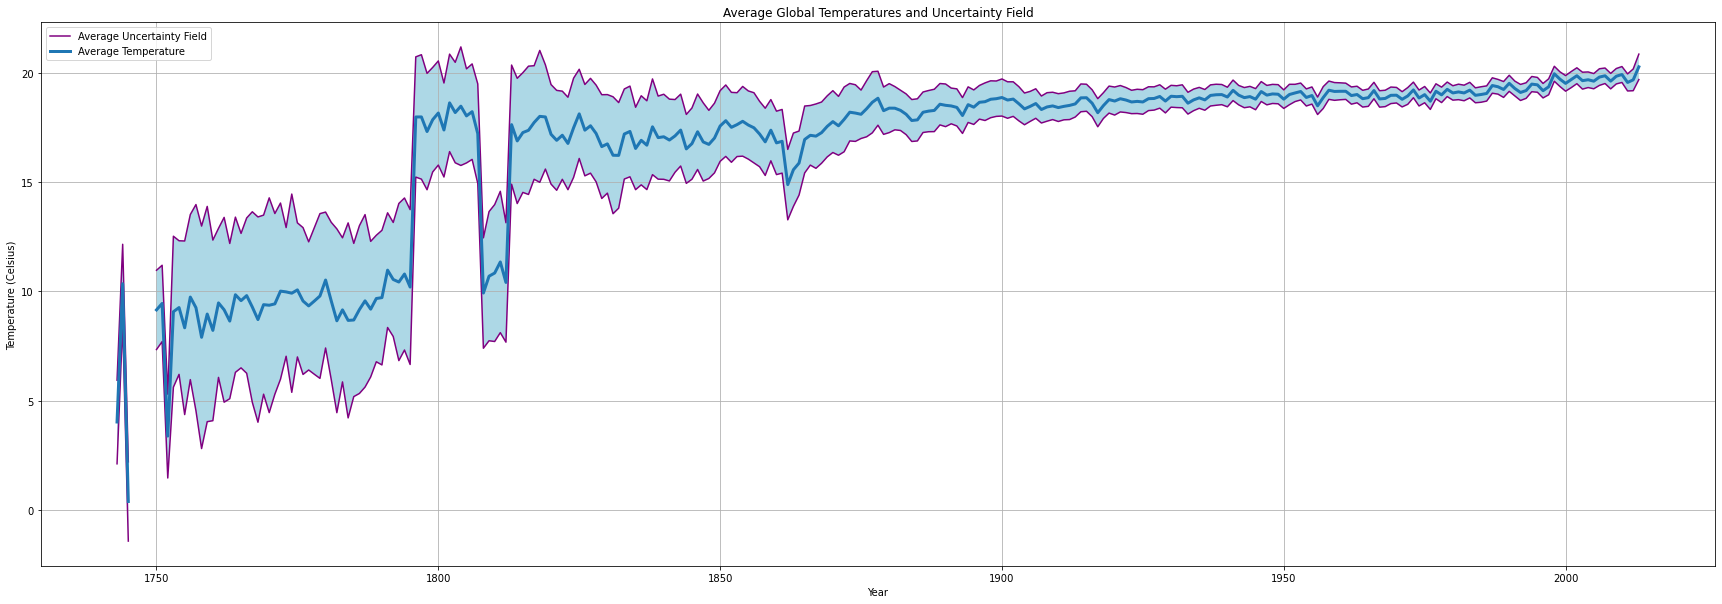

In [55]:
plt.figure(figsize=(30, 10))
plt.plot(global_temp['dt'], (global_temp['AverageTemperature'] + global_temp['AverageTemperatureUncertainty']), c='purple', label='Average Uncertainty Field')
plt.plot(global_temp['dt'], (global_temp['AverageTemperature'] - global_temp['AverageTemperatureUncertainty']), c='purple')
plt.fill_between(global_temp['dt'], (global_temp['AverageTemperature'] + global_temp['AverageTemperatureUncertainty']), (global_temp['AverageTemperature'] - global_temp['AverageTemperatureUncertainty']), facecolor='lightblue')
plt.plot(global_temp['dt'], global_temp['AverageTemperature'], linewidth=3, label='Average Temperature')
plt.grid(True)
plt.legend(loc='best')
plt.title("Average Global Temperatures and Uncertainty Field")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

Another powerful Python visualization library is seaborn which is based on matplotlib. Seaborn can do the same things as matplotlib and it makes plotting easier. It is often preferred, because user think the default settings in seaborn are more pleasing then in matplotlib. And the good thing is, if you know matplotlib, seaborn is really easy to learn. 
Let´s try some nice example plots (More plot examples can be found on http://seaborn.pydata.org/). 

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

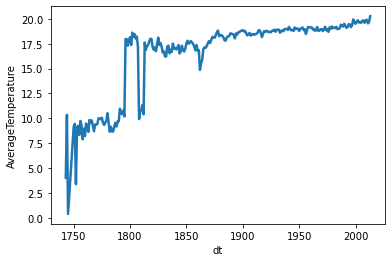

In [56]:
import seaborn as sns

sns.lineplot(x=global_temp['dt'], y=global_temp['AverageTemperature'], linewidth=2.5)

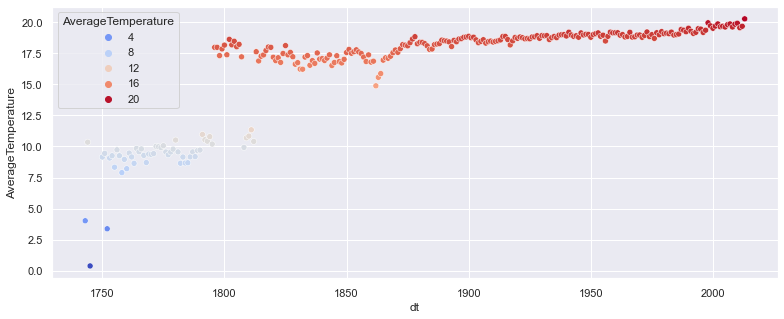

In [57]:
sns.set(style="darkgrid")

plt.figure(figsize=(13, 5))
ax = sns.scatterplot(x=global_temp['dt'], y=global_temp['AverageTemperature'], palette="coolwarm", hue=global_temp['AverageTemperature'])

/home/wascal/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


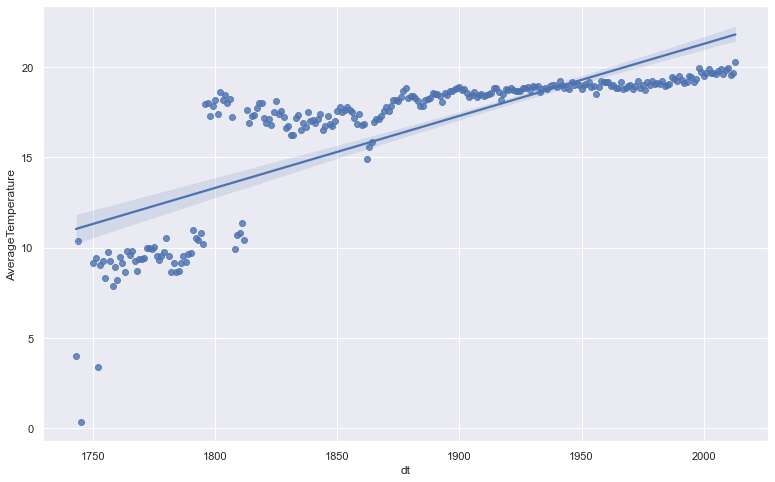

In [58]:
plt.figure(figsize=(13, 8))
ax = sns.regplot(global_temp['dt'], global_temp['AverageTemperature'])

In [75]:
global_temp = pd.read_csv("../data/GlobalLandTemperaturesByMajorCity.csv")
city = ["London","Berlin","Moscow","Tokyo","Peking","New York"]

In [76]:
temp=global_temp[(global_temp['dt'] >= '2008') & (global_temp['City'].isin(city))]


<AxesSubplot:xlabel='City', ylabel='AverageTemperature'>

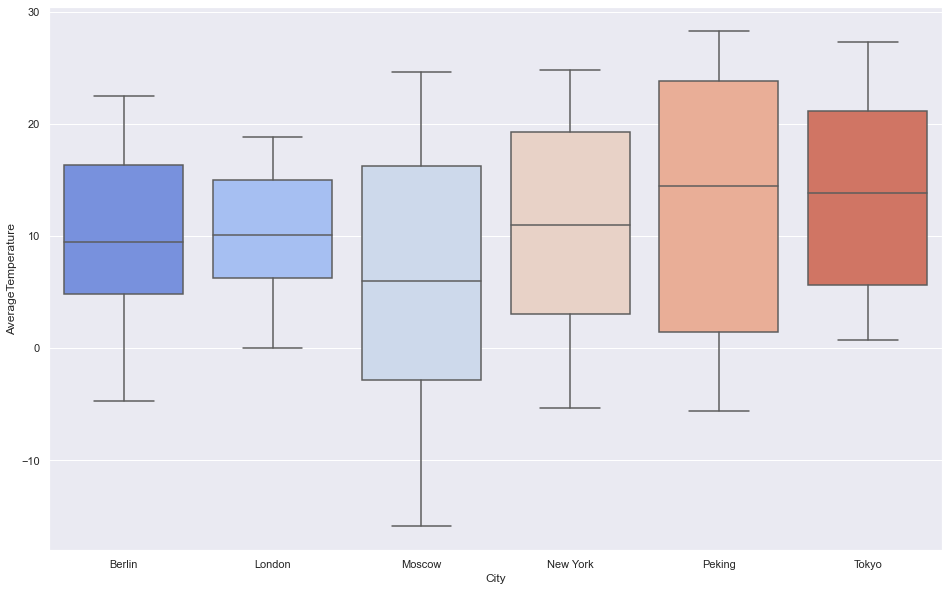

In [77]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(16, 10))

sns.boxplot(x='City', y="AverageTemperature", data=temp, palette="coolwarm")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

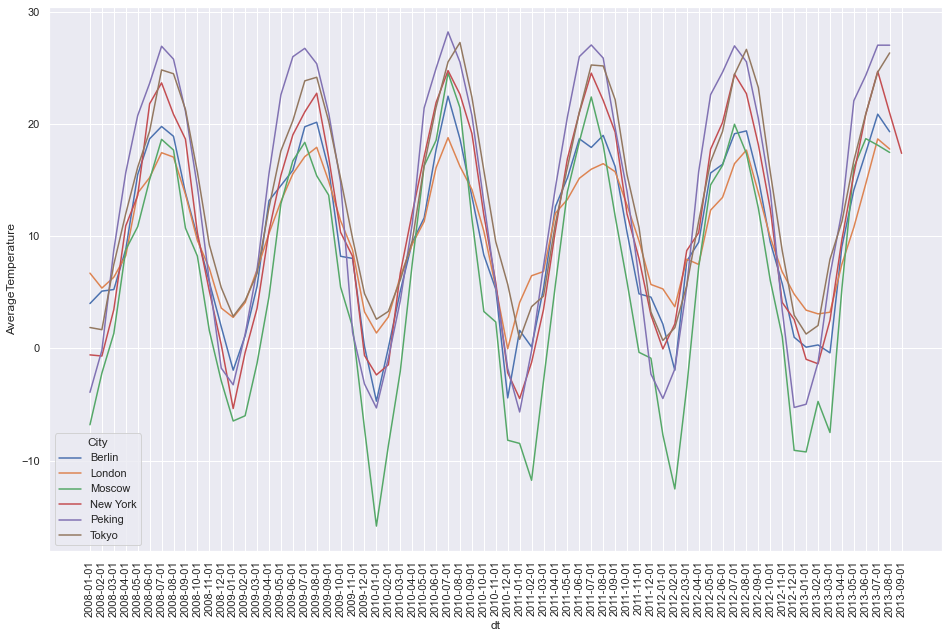

In [78]:
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(16, 10))
plt.xticks(rotation=90)

sns.lineplot(x='dt', y="AverageTemperature", hue='City' , data=temp)

#### Exercise 8

- Calculate the mean temperature (all countries) for each year plot the data
- Calculate the mean temperature of countries in Europe for each year (between 1990 and 2013). Create a plot with 4 graphs each showing the mean temperature for one season (spring, summer, autumn, winter) per year
- Calculate the intra-annual temperature difference for each country in Europe for the 2010 and create a barplot showing the ranked temperature difference 

## Example 1: City Temperature Analysis

In [85]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

global_temp=pd.read_csv("../data/GlobalLandTemperaturesByMajorCity.csv")

global_temp['AverageTemperature'].fillna(global_temp.AverageTemperature.mean(), inplace=True)

global_temp['dt'] =  pd.to_datetime(global_temp['dt'], format='%Y-%m-%d')

global_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704000,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434000,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101000,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140000,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427000,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979000,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522000,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251000,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528000,0.840,Xian,China,34.56N,108.97E


/tmp/ipykernel_221251/1219655446.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_temp_year = city_temp.groupby([city_temp["dt"].dt.year])['AverageTemperature','AverageTemperatureUncertainty' ].mean()
/home/wascal/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

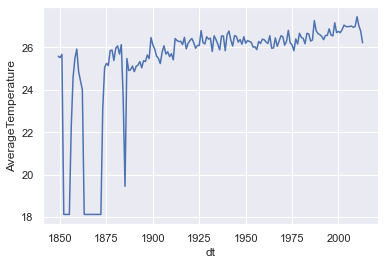

In [86]:
city = 'Abidjan'
global_temp = global_temp[(global_temp['dt'] > datetime.strptime('1810-01-01','%Y-%m-%d'))]
city_temp = global_temp[global_temp['City'] == city]
city_temp_year = city_temp.groupby([city_temp["dt"].dt.year])['AverageTemperature','AverageTemperatureUncertainty' ].mean()
city_temp_year
sns.lineplot(city_temp_year.index,city_temp_year['AverageTemperature'])

In [87]:
df_1800 = global_temp[(global_temp['dt'] > datetime.strptime('1810-01-01','%Y-%m-%d')) & (global_temp['dt'] < datetime.strptime('1910-01-01','%Y-%m-%d'))]
df_1900 = global_temp[(global_temp['dt'] > datetime.strptime('1910-01-01','%Y-%m-%d')) & (global_temp['dt'] < datetime.strptime('2010-01-01','%Y-%m-%d'))]

x_1800_1 = df_1800[df_1800.City == city]
x_1900_1 = df_1900[df_1900.City == city]
x_1800 = df_1800[df_1800.City == city].AverageTemperature
x_1900 = df_1900[df_1900.City == city].AverageTemperature  

In [88]:
df_1800 = city_temp[(city_temp['dt'] > datetime.strptime('1810-01-01','%Y-%m-%d')) & (city_temp['dt'] < datetime.strptime('1910-01-01','%Y-%m-%d'))]
df_1900 = city_temp[(city_temp['dt'] > datetime.strptime('1910-01-01','%Y-%m-%d')) & (city_temp['dt'] < datetime.strptime('2013-01-01','%Y-%m-%d'))]

x_1800 = df_1800.AverageTemperature
x_1900 = df_1900.AverageTemperature 

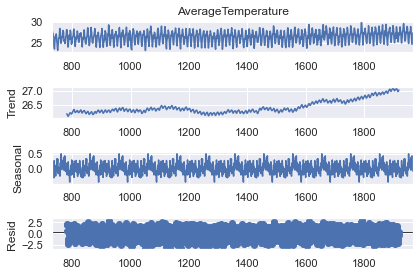

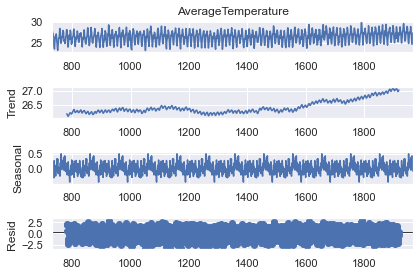

In [89]:
xx_1800 = seasonal_decompose(x_1800, model='additive',filt=None, period=99)
xx_1900 = seasonal_decompose(x_1900, model='additive',filt=None, period=99)

xx_1900.plot() 

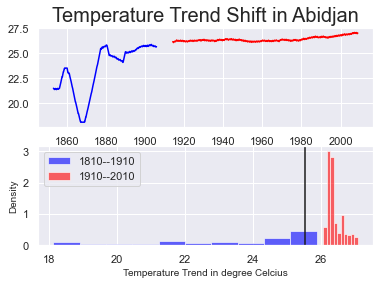

In [90]:
plt.subplot(2, 1,1)

plt.plot(df_1800.dt[xx_1800.trend.index],xx_1800.trend ,color='blue');
plt.plot((df_1900.dt[xx_1900.trend.index]),xx_1900.trend ,color='red');

plt.title('Temperature Trend Shift in '+ city, fontsize=20)
plt.subplot(2, 1,2)
n, x, _ = plt.hist(xx_1800.trend, density=True, alpha=.6, color='blue', label='1810--1910') 
x1 = x[1:]

dx = (x1.max()-x1.min())/20
maxx = x1[ n == n.max()]-dx

plt.axvline(x1[ n == n.max()]-dx,color='k')
n, x, _ = plt.hist(xx_1900.trend, density=True, alpha=.6, color='red', label='1910--2010')  
plt.legend()
plt.xlabel('Temperature Trend in degree Celcius', fontsize=10)
plt.ylabel('Density', fontsize=10)
    
plt.show()